 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df=pd.read_csv(whale_returns_csv)
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True),inplace=True)
whale_df.drop(columns=["Date"], inplace=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df=pd.read_csv(algo_returns_csv)
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True),inplace=True)
algo_df.drop(columns=["Date"], inplace=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df=pd.read_csv(sp500_history_csv)
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True),inplace=True)
sp500_df.drop(columns=["Date"], inplace=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()
sp500_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_df.columns = ["SP500"]
sp500_df.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df,algo_df,sp500_df], axis="columns",join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

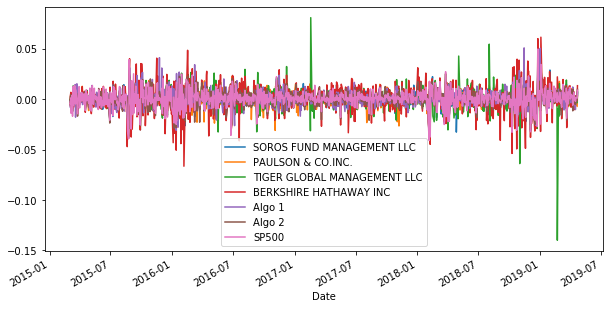

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(10,5))

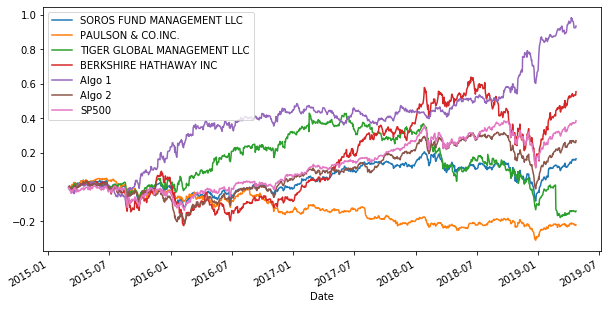

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1+combined_df).cumprod()-1
cumulative_returns.head()
cumulative_returns.plot(figsize=(10,5))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

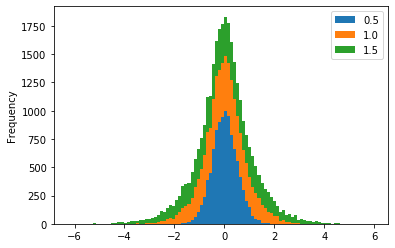

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
whale_std = np.random.normal(scale=0.5, size=10000)
algo_std = np.random.normal(scale=1.0, size=10000)
sp500_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": whale_std,
    "1.0": algo_std,
    "1.5": sp500_std
})
portfolio_std.plot.hist(stacked=True, bins=100) 

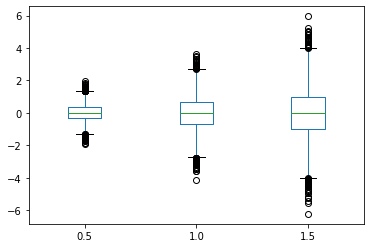

In [18]:
portfolio_std.plot.box() 

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_std = combined_std.sort_values(ascending = False)
combined_std
# answer: Berkshire Hathaway, Tiger GM

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = combined_std*np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

# Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

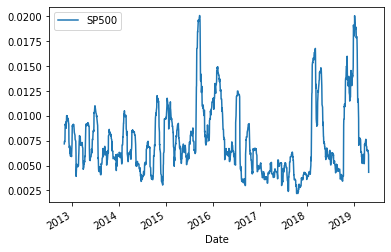

In [22]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_df.rolling(window=21).std().plot() 

In [23]:
# Correlation
# YOUR CODE HERE
correlation = combined_df.corr() 
correlation
# Answer: Algo 2 mimics SP500 the most

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = combined_df["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_df["SP500"])
variance = combined_df["SP500"].var()
tiger_beta = covariance / variance
tiger_beta

0.7946528805681052

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [25]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [26]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean()*252)/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

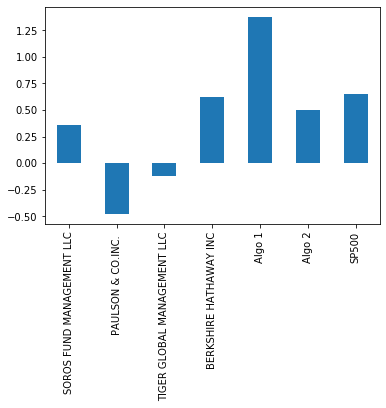

In [27]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar")
# Answer: Algo 1 outperforms both market and whales

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
# YOUR CODE HERE
abc_csv = Path("Resources/abc.csv")
abc_df=pd.read_csv(abc_csv)
abc_df.set_index(pd.to_datetime(abc_df['Date'], infer_datetime_format=True),inplace=True)
abc_df.drop(columns=["Date"], inplace=True)
abc_df.sort_index(inplace=True)
abc_df.head()

,ABC
Date,
2019-04-22,71.06
2019-04-23,73.43
2019-04-24,74.09
2019-04-25,73.72
2019-04-26,74.05


In [29]:
# Read the second stock
# YOUR CODE HERE
cah_csv = Path("Resources/cah.csv")
cah_df=pd.read_csv(cah_csv)
cah_df.set_index(pd.to_datetime(cah_df['Date'], infer_datetime_format=True),inplace=True)
cah_df.drop(columns=["Date"], inplace=True)
cah_df.sort_index(inplace=True)
cah_df.head()

,CAH
Date,
2019-04-22,45.26
2019-04-23,46.08
2019-04-24,46.58
2019-04-25,46.85
2019-04-26,47.51


In [30]:
# Read the third stock
# YOUR CODE HERE
mck_csv = Path("Resources/mck.csv")
mck_df=pd.read_csv(mck_csv)
mck_df.set_index(pd.to_datetime(mck_df['Date'], infer_datetime_format=True),inplace=True)
mck_df.drop(columns=["Date"], inplace=True)
mck_df.sort_index(inplace=True)
mck_df.head()

,MCK
Date,
2019-04-22,112.47
2019-04-23,115.20
2019-04-24,115.33
2019-04-25,115.21
2019-04-26,117.58


In [31]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_df = pd.concat([abc_df,cah_df,mck_df], axis="columns",join="inner")
custom_df.head()


,ABC,CAH,MCK
Date,,,
2019-04-22,71.06,45.26,112.47
2019-04-23,73.43,46.08,115.20
2019-04-24,74.09,46.58,115.33
2019-04-25,73.72,46.85,115.21
2019-04-26,74.05,47.51,117.58


In [32]:
# Reset the index
# YOUR CODE HERE
# Comment: index is already set

In [33]:
# Drop Nulls
# YOUR CODE HERE
custom_df.isnull().sum()

ABC    0
CAH    0
MCK    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
all_returns_NA = custom_df.pct_change()
all_returns = all_returns_NA.dropna()
all_returns.head()
weighted_returns = all_returns.dot(weights)
weighted_returns.head()

Date
2019-04-23    0.025248
2019-04-24    0.006989
2019-04-25   -0.000079
2019-04-26    0.013045
2019-04-29    0.003819
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# YOUR CODE HERE

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
# Comment: already dropped NaNs
combined_weighted_custom = pd.concat([all_returns, weighted_returns], axis="columns",join="inner")
combined_weighted_custom = combined_weighted_custom.rename(columns={
    0: "Weighted Returns",
})
combined_weighted_custom.head()

,ABC,CAH,MCK,Weighted Returns
Date,,,,
2019-04-23,0.033352,0.018118,0.024273,0.025248
2019-04-24,0.008988,0.010851,0.001128,0.006989
2019-04-25,-0.004994,0.005796,-0.001040,-0.000079
2019-04-26,0.004476,0.014088,0.020571,0.013045
2019-04-29,0.006212,-0.001473,0.006719,0.003819


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
# YOUR CODE HERE
combined_weighted_custom_std = combined_weighted_custom.std()
combined_weighted_custom_std

ABC                 0.026050
CAH                 0.025775
MCK                 0.027903
Weighted Returns    0.025093
dtype: float64

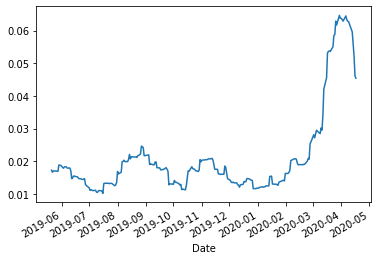

In [38]:
# Rolling
# YOUR CODE HERE
weighted_returns.rolling(window=21).std().plot() 

In [39]:
# Beta
# YOUR CODE HERE
# Comment: adding S&P returns to the dataframe to determine Beta
market_csv = Path("Resources/market(sp).csv")
market_df=pd.read_csv(market_csv)
market_df.set_index(pd.to_datetime(market_df['Date'], infer_datetime_format=True),inplace=True)
market_df.drop(columns=["Date"], inplace=True)
market_df.sort_index(inplace=True)
market_df = market_df.pct_change()
final_df = pd.concat([combined_weighted_custom,market_df], axis="columns",join="inner")
final_df = final_df.rename(columns={
    "Close": "S&P500",
})
final_df.head()
covariance = final_df["Weighted Returns"].cov(final_df["S&P500"])
variance = final_df["S&P500"].var()
my_portfolio_beta = covariance / variance
my_portfolio_beta

0.9385430808719174

In [40]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
my_portfolio_sharpe_ratios = (final_df.mean()*252)/(final_df.std()*np.sqrt(252))
my_portfolio_sharpe_ratios

ABC                 0.758352
CAH                 0.508567
MCK                 0.742912
Weighted Returns    0.711931
S&P500              0.124423
dtype: float64

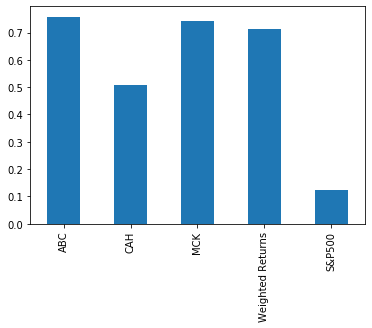

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
my_portfolio_sharpe_ratios.plot(kind="bar")

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE
my_portfolio_correlation = final_df.corr() 
my_portfolio_correlation

,ABC,CAH,MCK,Weighted Returns,S&P500
ABC,1.000000,0.811383,0.866134,0.944911,0.732253
CAH,0.811383,1.000000,0.831860,0.931516,0.716503
MCK,0.866134,0.831860,1.000000,0.955217,0.688636
Weighted Returns,0.944911,0.931516,0.955217,1.000000,0.753977
S&P500,0.732253,0.716503,0.688636,0.753977,1.000000
